In [32]:
import pandas as pd
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
#rom koila import lazy
import numpy as np
import torch
import os

In [33]:
torch.cuda.is_available()

True

### Load the Images?

In [34]:
path = 'categorized_resized_byteplot_split/'

dls = ImageDataLoaders.from_folder(path, valid="val", train="train", seed="696969", bs=16)
#dls.valid_ds.items[:3]
#dls = lazy(dls)


KeyboardInterrupt: 

In [ ]:
learner = vision_learner(dls, resnet50)
torch.cuda.empty_cache()
learner.lr_find()

KeyboardInterrupt: 

In [ ]:
learner.fit_one_cycle(1)

epoch,train_loss,valid_loss,time
0,0.166020,0.110853,37:28


In [ ]:
tta = learner.tta(use_max=True)

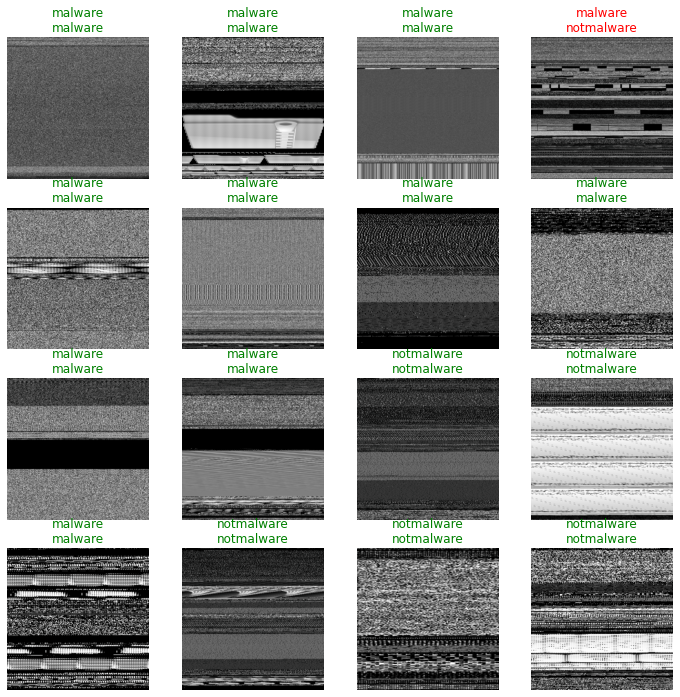

In [ ]:
learner.show_results(max_n=16)

### Confusing Matrix

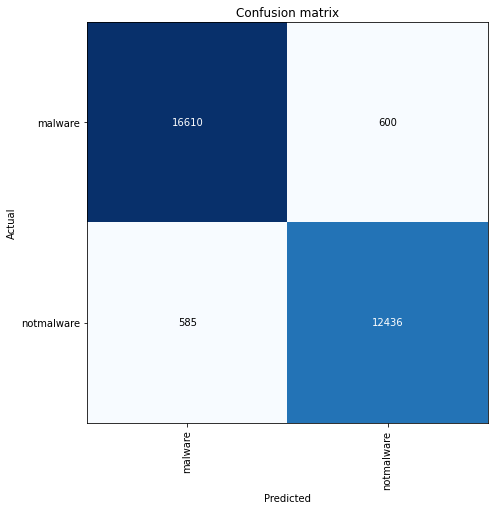

In [ ]:
interp = ClassificationInterpretation.from_learner(learner)
losses,idxs = interp.top_losses()
len(dls.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix(figsize=(7,7))

### Saving


In [ ]:
torch.save(learner, "model.pkl")

In [ ]:
learner = torch.load("model.pkl")

### Testing with test data

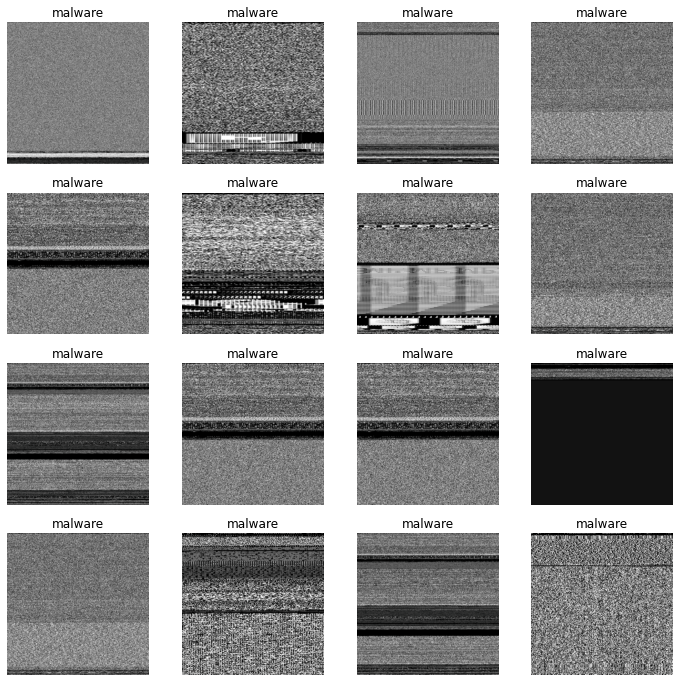

In [52]:
#learner.predict(f'{path}/test/malware/565.png')
test_images = get_image_files(f'{path}/test')
test_dl = dls.test_dl(test_images, with_labels=True)
test_dl.show_batch(max_n=30)

In [60]:
preds, y = learner.get_preds(dl=test_dl)

Accuracy of test dl

In [72]:
accuracy(preds, y)

TensorBase(0.9617)

: 

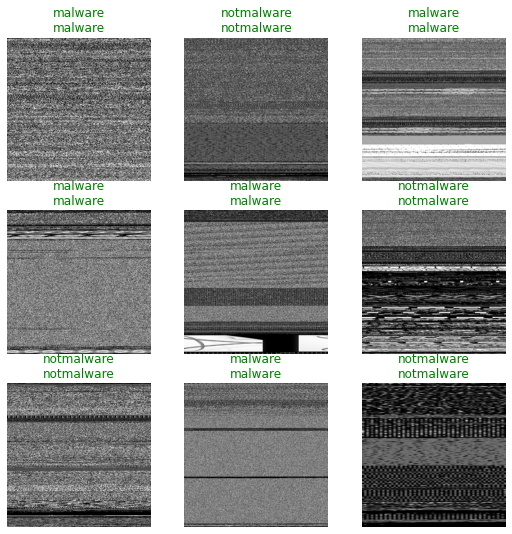

In [70]:
#learner.validate(dl=test_dl)